In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
clauseList = [[0,1],
              [0,2],
              [1,3],
              [2,3]]

In [4]:
def XOR(qc, p, q, outp):
    qc.cx(p, outp)
    qc.cx(q, outp)

In [5]:
def diffuser(reg):
    qc.h(reg)
    qc.x(reg)
    qc.h(reg[len(reg)-1])
    qc.mct(list(range(len(reg)-1)),len(reg)-1)
    qc.h(reg[len(reg)-1])
    qc.x(reg)
    qc.h(reg)

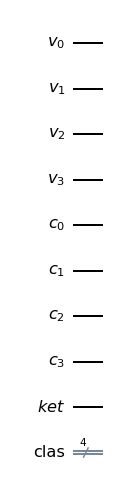

In [6]:
inQ = QuantumRegister(4, name = 'v')
clauseQ = QuantumRegister(4, name = 'c')
auxbit = QuantumRegister(1, name = 'ket')
cbits = ClassicalRegister(4, name = 'clas')
qc = QuantumCircuit(inQ, clauseQ, auxbit, cbits)
qc.draw()

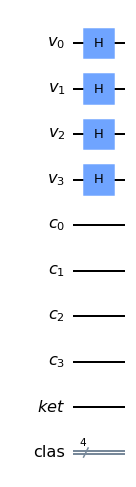

In [7]:
qc.h(inQ)
qc.draw()

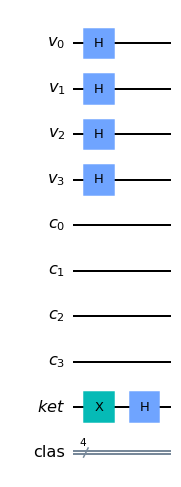

In [8]:
qc.x(auxbit)
qc.h(auxbit)
qc.draw()

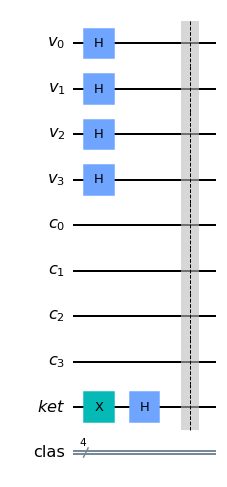

In [9]:
qc.barrier()
qc.draw()

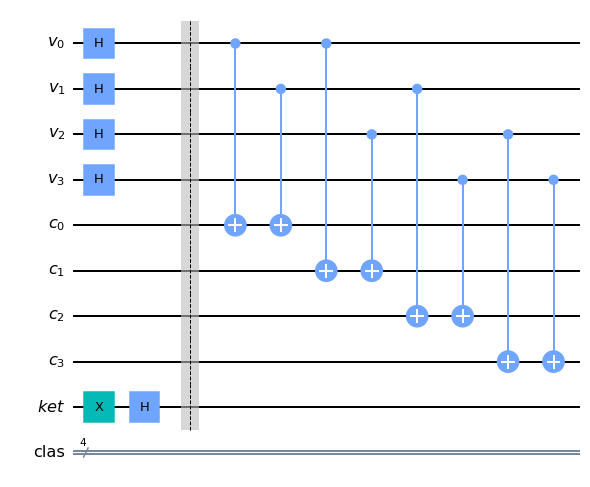

In [10]:
i = 0
for cl in clauseList:
    XOR(qc, cl[0], cl[1], clauseQ[i])
    i += 1
        
qc.draw()


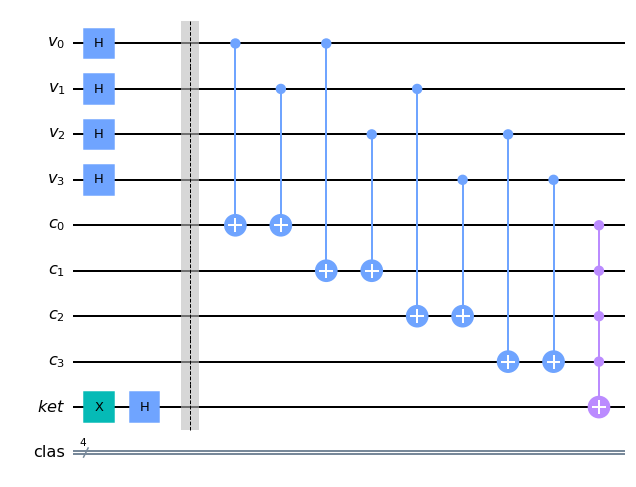

In [11]:
qc.mct(clauseQ, auxbit)
qc.draw()

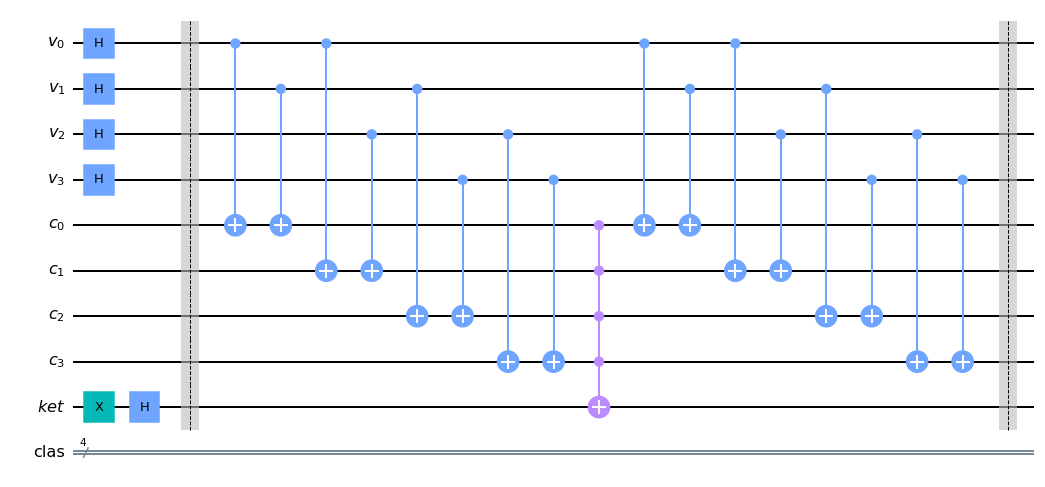

In [12]:
i = 0
for cl in clauseList:
    XOR(qc, cl[0], cl[1], clauseQ[i])
    i += 1
qc.barrier()
qc.draw()

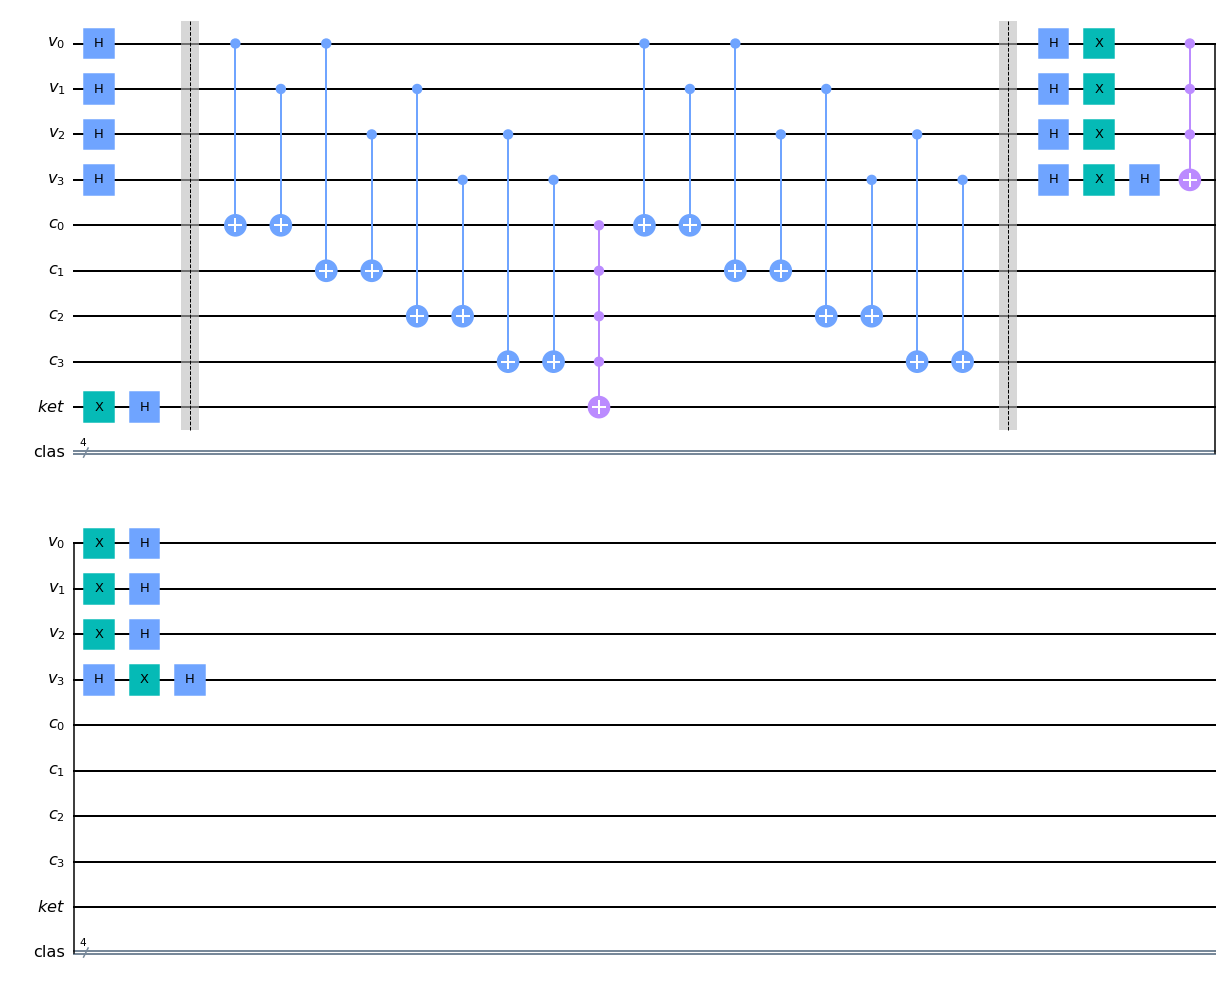

In [13]:
diffuser(inQ)
qc.draw()

In [14]:
qc.barrier()


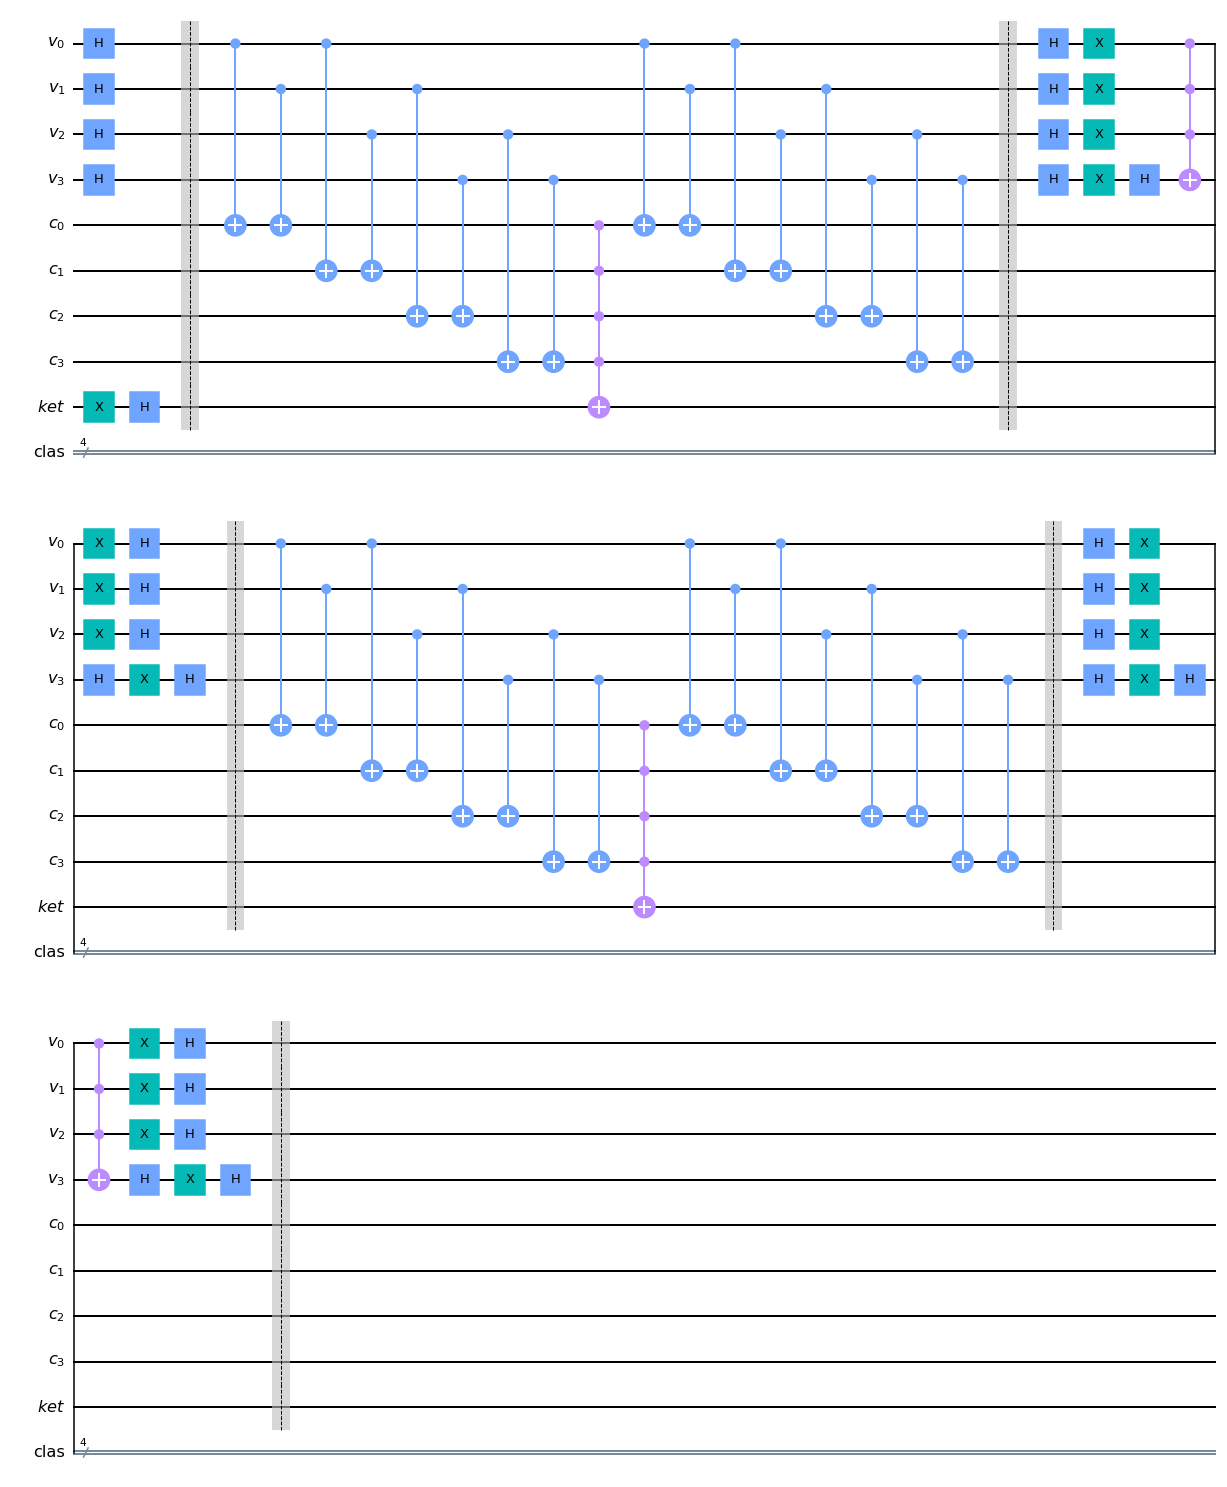

In [15]:
i = 0
for cl in clauseList:
    XOR(qc, cl[0], cl[1], clauseQ[i])
    i += 1
      
qc.mct(clauseQ, auxbit)
i = 0
for cl in clauseList:
    XOR(qc, cl[0], cl[1], clauseQ[i])
    i += 1
qc.barrier()
diffuser(inQ)
qc.barrier()
qc.draw()


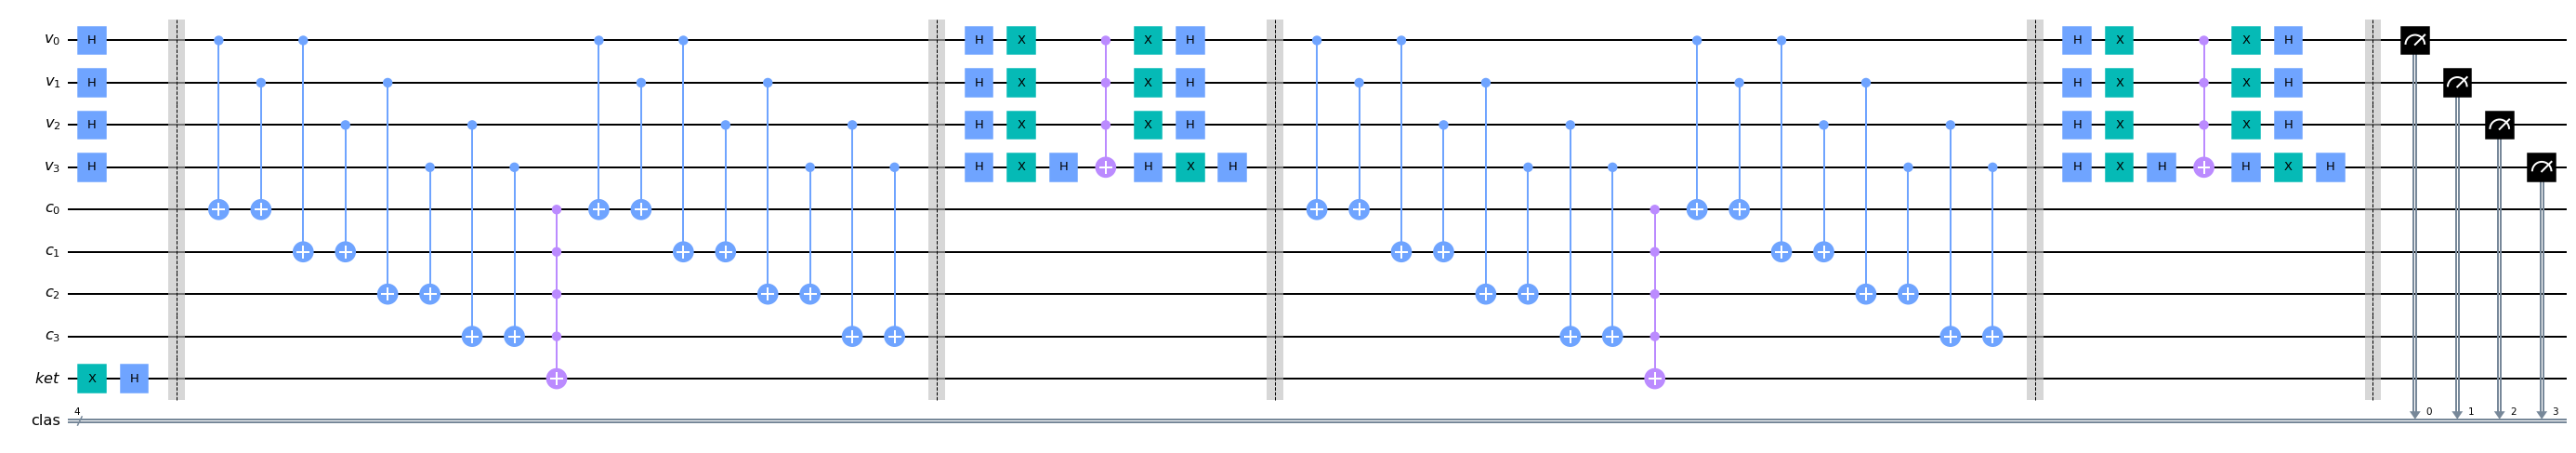

In [16]:
qc.measure(inQ, cbits)
qc.draw(fold = -1)

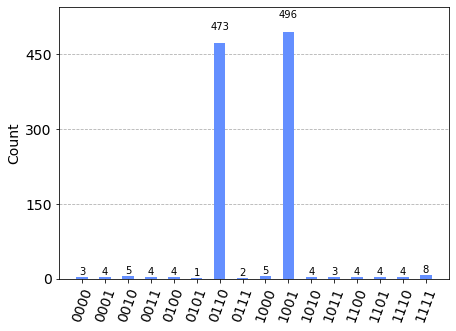

In [17]:
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_simulator.run(qobj).result()
plot_histogram(result.get_counts())